In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [123]:
data = pd.read_csv("used_cs_1.csv")
data.head(2)

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
0,MITSUBISHI PAJERO 3.5L / 2013,"26,000",167390,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,Unknown,Gasoline,Left Hand Side,2013.0,Silver,Dubai,GLS,mitsubishi,pajero,13/05/2022
1,chevrolet silverado,"110,000",39000,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,North American Specs,400 - 500 HP,Gasoline,Left Hand Side,2018.0,White,Sharjah,1500 High Country,chevrolet,silverado,14/01/2022


# Check the details

In [124]:
data.describe()

,kilometers,year
count,9.970000e+03,9000.000000
mean,9.894896e+04,2015.626444
std,1.154300e+06,4.735991
min,0.000000e+00,1953.000000
25%,2.314350e+04,2014.000000
50%,7.600000e+04,2016.000000
75%,1.330828e+05,2019.000000
max,1.150000e+08,2021.000000


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9970 entries, 0 to 9969
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 9965 non-null   object 
 1   price_in_aed          9970 non-null   object 
 2   kilometers            9970 non-null   int64  
 3   body_condition        9970 non-null   object 
 4   mechanical_condition  9970 non-null   object 
 5   seller_type           9970 non-null   object 
 6   body_type             9970 non-null   object 
 7   no_of_cylinders       9889 non-null   object 
 8   transmission_type     9970 non-null   object 
 9   regional_specs        9970 non-null   object 
 10  horsepower            9970 non-null   object 
 11  fuel_type             9970 non-null   object 
 12  steering_side         9970 non-null   object 
 13  year                  9000 non-null   float64
 14  color                 9970 non-null   object 
 15  emirate              

# Look at the total number of missing values in each column

In [126]:
data.isnull().sum()

title                     5
price_in_aed              0
kilometers                0
body_condition            0
mechanical_condition      0
seller_type               0
body_type                 0
no_of_cylinders          81
transmission_type         0
regional_specs            0
horsepower                0
fuel_type                 0
steering_side             0
year                    970
color                     0
emirate                   0
motors_trim              28
company                   0
model                     0
date_posted               0
dtype: int64

In [127]:
data.dropna(inplace = True)

# Feature Selection 

In [128]:
data.columns

Index(['title', 'price_in_aed', 'kilometers', 'body_condition',
       'mechanical_condition', 'seller_type', 'body_type', 'no_of_cylinders',
       'transmission_type', 'regional_specs', 'horsepower', 'fuel_type',
       'steering_side', 'year', 'color', 'emirate', 'motors_trim', 'company',
       'model', 'date_posted'],
      dtype='object')

In [129]:
to_drop = ['title' ,'seller_type', 'regional_specs',  'fuel_type', 'color', 'emirate', 'motors_trim','model', 'date_posted']
data.drop(columns = to_drop, inplace = True)

# Getting columns into appropriate data type and units

# Price column

In [130]:
data['price_in_aed'] = data['price_in_aed'].astype("category")
data['price_in_aed'] = data['price_in_aed'].str.replace(",","")
data['price_in_aed'] = data['price_in_aed'].astype(float)
data['Price_USD'] = data['price_in_aed']*0.2722

In [131]:
#data.info()

# Kilometer column

In [132]:
data['Mileage'] = data['kilometers'] * 0.6213

In [133]:
data.drop(columns = ['price_in_aed', 'kilometers'], inplace = True)

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8944 entries, 0 to 9969
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   body_condition        8944 non-null   object 
 1   mechanical_condition  8944 non-null   object 
 2   body_type             8944 non-null   object 
 3   no_of_cylinders       8944 non-null   object 
 4   transmission_type     8944 non-null   object 
 5   horsepower            8944 non-null   object 
 6   steering_side         8944 non-null   object 
 7   year                  8944 non-null   float64
 8   company               8944 non-null   object 
 9   Price_USD             8944 non-null   float64
 10  Mileage               8944 non-null   float64
dtypes: float64(3), object(8)
memory usage: 838.5+ KB


In [135]:
data.head()

,body_condition,mechanical_condition,body_type,no_of_cylinders,transmission_type,horsepower,steering_side,year,company,Price_USD,Mileage
0,Perfect inside and out,Perfect inside and out,SUV,6,Automatic Transmission,Unknown,Left Hand Side,2013.0,mitsubishi,7077.2,103999.407
1,Perfect inside and out,Perfect inside and out,SUV,8,Automatic Transmission,400 - 500 HP,Left Hand Side,2018.0,chevrolet,29942.0,24230.700
2,Perfect inside and out,Perfect inside and out,Sedan,6,Automatic Transmission,400 - 500 HP,Left Hand Side,2014.0,mercedes-benz,21231.6,124260.000
3,Perfect inside and out,Perfect inside and out,Hard Top Convertible,8,Automatic Transmission,600 - 700 HP,Left Hand Side,2018.0,ferrari,244707.8,16775.100
4,Perfect inside and out,Perfect inside and out,Wagon,4,Manual Transmission,Less than 150 HP,Left Hand Side,2020.0,renault,8982.6,42869.700


# Number of cylinders column

In [136]:
data['no_of_cylinders'].value_counts()

no_of_cylinders
6          3050
4          2804
8          2630
12          282
3            53
Unknown      44
5            42
10           39
Name: count, dtype: int64

In [137]:
mask_cly = (data['no_of_cylinders'] != 'Unknown') & (data['no_of_cylinders'] !='None')
#data[mask_cly]
data = data[mask_cly]

In [138]:
data['no_of_cylinders'] = data['no_of_cylinders'].astype(float)

# Hoursepower column

In [139]:
mask_hp = data['horsepower'] != 'Unknown'
data = data[mask_hp]
map_hp = {'200 - 300 HP':'250', '300 - 400 HP':'350','150 - 200 HP':'175','400 - 500 HP':'450',
         '600 - 700 HP':'650','700 - 800 HP':'750','800 - 900 HP':'850', '900+ HP':'950',
         'Less than 150 HP':'125'}
data['horsepower'] = data['horsepower'].map(map_hp)
data['horsepower'] = data['horsepower'].astype(float)
data.dropna(inplace= True)

# Body condition column


In [142]:
map_body_condition = {'Perfect inside and out': '10', 'A bit of wear & tear, all repaired': '7',
                     'No accidents, very few faults': '6', 'Normal wear & tear, a few issues': '4'}
data['body_condition'] = data['body_condition'].map(map_body_condition)
data['body_condition'] = data['body_condition'].astype(float)

# Mechanical Condition column

In [143]:
map_mech_condition = {'Perfect inside and out': '10', 'Minor faults, all fixed': '8',
                     'Major faults fixed, small remain': '5', 'Ongoing minor & major faults': '4',
                     'Major faults, all fixed':'6'}
data['mechanical_condition'] = data['mechanical_condition'].map(map_mech_condition)
data['mechanical_condition'] = data['mechanical_condition'].astype(float)

In [144]:
data.head()

,body_condition,mechanical_condition,body_type,no_of_cylinders,transmission_type,horsepower,steering_side,year,company,Price_USD,Mileage
1,10.0,10.0,SUV,8.0,Automatic Transmission,450.0,Left Hand Side,2018.0,chevrolet,29942.0,24230.7
2,10.0,10.0,Sedan,6.0,Automatic Transmission,450.0,Left Hand Side,2014.0,mercedes-benz,21231.6,124260.0
3,10.0,10.0,Hard Top Convertible,8.0,Automatic Transmission,650.0,Left Hand Side,2018.0,ferrari,244707.8,16775.1
4,10.0,10.0,Wagon,4.0,Manual Transmission,125.0,Left Hand Side,2020.0,renault,8982.6,42869.7
5,10.0,10.0,Sedan,6.0,Automatic Transmission,250.0,Left Hand Side,2015.0,audi,26675.6,52189.2


# Steering side column

In [145]:
data['steering_side'].value_counts()

steering_side
Left Hand Side     7363
Right Hand Side       2
Name: count, dtype: int64

In [146]:
data.drop(columns = ['steering_side'], inplace = True)

In [147]:
#data['company'].value_counts()

# Transmission column

In [148]:
data['transmission_type'].value_counts()

transmission_type
Automatic Transmission    7092
Manual Transmission        273
Name: count, dtype: int64

In [149]:
map_tranny = {'Automatic Transmission': 1, 'Manual Transmission': 0}
data['transmission_type'] = data['transmission_type'].map(map_tranny)
data['transmission_type']  =data['transmission_type'].astype(float)

In [150]:
data['body_type'].value_counts()

body_type
SUV                     3250
Sedan                   2172
Coupe                    618
Pick Up Truck            307
Hatchback                302
Sports Car               186
Van                      136
Hard Top Convertible     114
Soft Top Convertible      95
Crossover                 72
Other                     57
Wagon                     39
Utility Truck             17
Name: count, dtype: int64

In [151]:
data.head()

,body_condition,mechanical_condition,body_type,no_of_cylinders,transmission_type,horsepower,year,company,Price_USD,Mileage
1,10.0,10.0,SUV,8.0,1.0,450.0,2018.0,chevrolet,29942.0,24230.7
2,10.0,10.0,Sedan,6.0,1.0,450.0,2014.0,mercedes-benz,21231.6,124260.0
3,10.0,10.0,Hard Top Convertible,8.0,1.0,650.0,2018.0,ferrari,244707.8,16775.1
4,10.0,10.0,Wagon,4.0,0.0,125.0,2020.0,renault,8982.6,42869.7
5,10.0,10.0,Sedan,6.0,1.0,250.0,2015.0,audi,26675.6,52189.2


In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7365 entries, 1 to 9969
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   body_condition        7365 non-null   float64
 1   mechanical_condition  7365 non-null   float64
 2   body_type             7365 non-null   object 
 3   no_of_cylinders       7365 non-null   float64
 4   transmission_type     7365 non-null   float64
 5   horsepower            7365 non-null   float64
 6   year                  7365 non-null   float64
 7   company               7365 non-null   object 
 8   Price_USD             7365 non-null   float64
 9   Mileage               7365 non-null   float64
dtypes: float64(8), object(2)
memory usage: 632.9+ KB


# Outlier Treatment

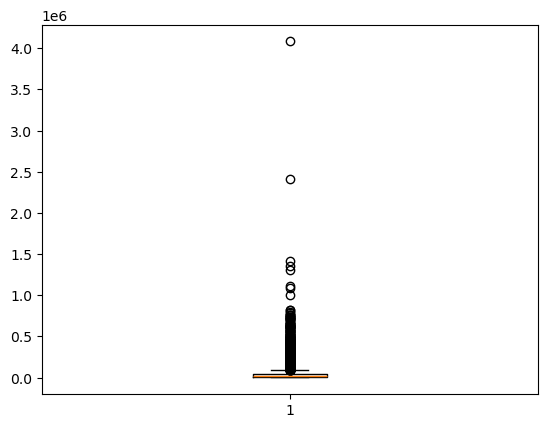

In [153]:
plt.boxplot(data['Price_USD'])
plt.show()

In [154]:
mask_price = data['Price_USD'] <= 500000
data_1 = data[mask_price]


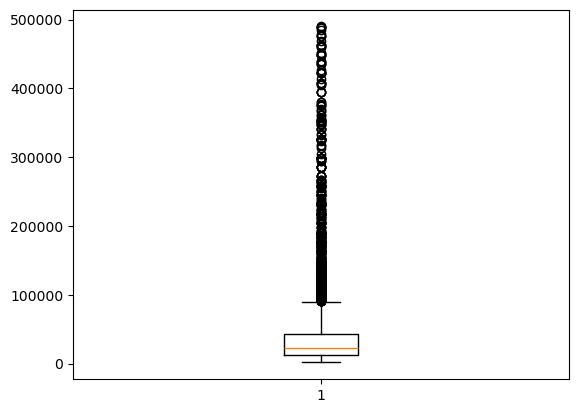

In [155]:
plt.boxplot(data_1['Price_USD'])
plt.show()

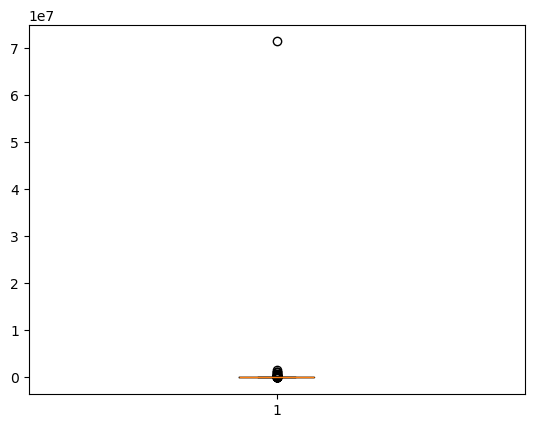

In [156]:
plt.boxplot(data_1['Mileage'])
plt.show()

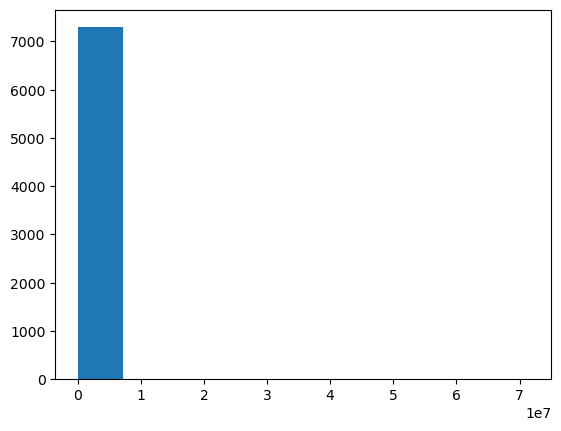

In [157]:
plt.hist(data_1['Mileage'])
plt.show()

In [158]:
mask_mileage = data_1['Mileage'] <= 100000
data_2 = data_1[mask_mileage]


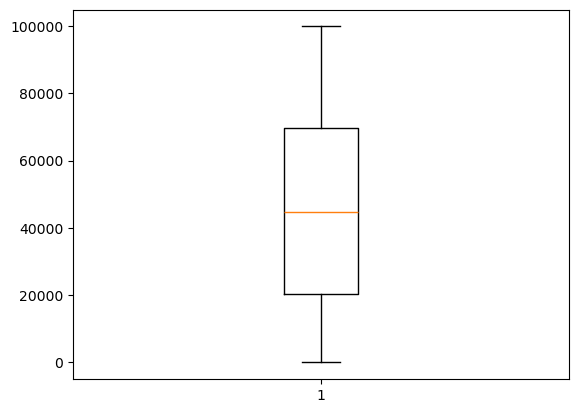

In [159]:
plt.boxplot(data_2['Mileage'])
plt.show()

In [160]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6031 entries, 1 to 9969
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   body_condition        6031 non-null   float64
 1   mechanical_condition  6031 non-null   float64
 2   body_type             6031 non-null   object 
 3   no_of_cylinders       6031 non-null   float64
 4   transmission_type     6031 non-null   float64
 5   horsepower            6031 non-null   float64
 6   year                  6031 non-null   float64
 7   company               6031 non-null   object 
 8   Price_USD             6031 non-null   float64
 9   Mileage               6031 non-null   float64
dtypes: float64(8), object(2)
memory usage: 518.3+ KB


In [161]:
data_2.reset_index(inplace= True, drop = True)

In [162]:
data.head(2)

,body_condition,mechanical_condition,body_type,no_of_cylinders,transmission_type,horsepower,year,company,Price_USD,Mileage
1,10.0,10.0,SUV,8.0,1.0,450.0,2018.0,chevrolet,29942.0,24230.7
2,10.0,10.0,Sedan,6.0,1.0,450.0,2014.0,mercedes-benz,21231.6,124260.0


# Feature Scaling

In [163]:
data_2.columns

Index(['body_condition', 'mechanical_condition', 'body_type',
       'no_of_cylinders', 'transmission_type', 'horsepower', 'year', 'company',
       'Price_USD', 'Mileage'],
      dtype='object')

In [164]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6031 entries, 0 to 6030
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   body_condition        6031 non-null   float64
 1   mechanical_condition  6031 non-null   float64
 2   body_type             6031 non-null   object 
 3   no_of_cylinders       6031 non-null   float64
 4   transmission_type     6031 non-null   float64
 5   horsepower            6031 non-null   float64
 6   year                  6031 non-null   float64
 7   company               6031 non-null   object 
 8   Price_USD             6031 non-null   float64
 9   Mileage               6031 non-null   float64
dtypes: float64(8), object(2)
memory usage: 471.3+ KB


In [165]:
data_2.isna().sum()

body_condition          0
mechanical_condition    0
body_type               0
no_of_cylinders         0
transmission_type       0
horsepower              0
year                    0
company                 0
Price_USD               0
Mileage                 0
dtype: int64

In [166]:
numerical_columns = ['body_condition', 'mechanical_condition', 'no_of_cylinders', 'transmission_type', 'horsepower', 'year', 'Price_USD', 'Mileage']

In [167]:
scaler= Normalizer()
scaler.fit_transform(data_2[numerical_columns])

array([[2.59244433e-04, 2.59244433e-04, 2.07395547e-04, ...,
        5.23155266e-02, 7.76229682e-01, 6.28167409e-01],
       [4.07678596e-05, 4.07678596e-05, 3.26142877e-05, ...,
        8.22695407e-03, 9.97621323e-01, 6.83884922e-02],
       [2.28063692e-04, 2.28063692e-04, 9.12254766e-05, ...,
        4.60688657e-02, 2.04860492e-01, 9.77702204e-01],
       ...,
       [2.35739205e-04, 2.35739205e-04, 1.88591364e-04, ...,
        4.74778760e-02, 5.77513905e-01, 8.14929971e-01],
       [6.88409451e-05, 1.14734909e-04, 4.58939634e-05, ...,
        2.30961371e-02, 5.90262916e-02, 9.97987181e-01],
       [1.73909306e-04, 1.73909306e-04, 1.04345583e-04, ...,
        3.50079433e-02, 3.67817138e-01, 9.29228725e-01]])

In [169]:
data_scaled = pd.DataFrame(scaler.fit_transform(data_2[numerical_columns]), columns= numerical_columns)

In [173]:
data_clean = pd.concat([data_scaled, data_2['body_type'], data_2['company']], axis = 1)

# One hot encoding: Categorical columns

In [174]:
data_body_type = pd.get_dummies(data_clean['body_type'], dtype = int, drop_first= True)

In [175]:
data_company = pd.get_dummies(data_clean['company'], dtype = int, drop_first= True)

In [177]:
data_clean.drop(columns = ['body_type', 'company'], inplace = True)

In [179]:
data_one_hot_encoded = pd.concat([data_clean, data_body_type, data_company], axis = 1)

In [1]:
#data_one_hot_encoded

In [2]:
#data_clean.corr()